In [1]:
import tensorflow as tf
import os

In [2]:
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
else:
    print("No GPU devices found.")


No GPU devices found.


In [3]:
tf.config.list_physical_devices('GPU')

[]

In [4]:
import cv2
import imghdr

C:\Users\ACER\AppData\Local\Temp\ipykernel_12856\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [5]:
data_dir = 'data'

In [6]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [7]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [10]:
data_iterator = data.as_numpy_iterator()

In [11]:
batch = data_iterator.next()

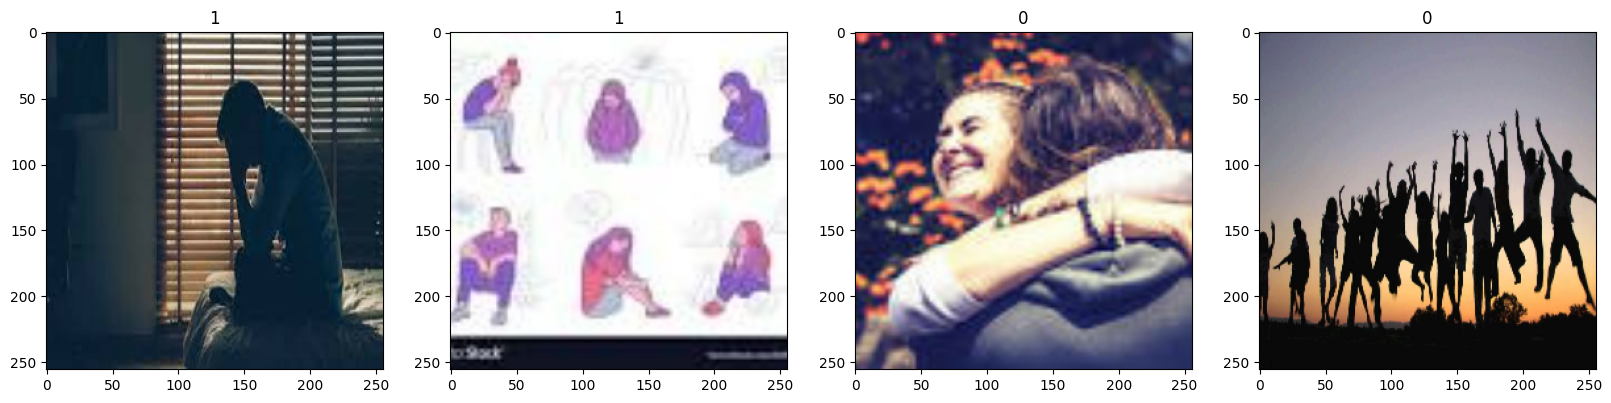

In [12]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [13]:
data = data.map(lambda x,y: (x/255, y))

In [14]:
data.as_numpy_iterator().next()

(array([[[[0.2509804 , 0.48039216, 0.55490196],
          [0.3       , 0.52156866, 0.60588235],
          [0.30588236, 0.5117647 , 0.6156863 ],
          ...,
          [0.5882353 , 0.5803922 , 0.5294118 ],
          [0.5803922 , 0.57254905, 0.52156866],
          [0.57058823, 0.5627451 , 0.5117647 ]],
 
         [[0.2509804 , 0.48235294, 0.54509807],
          [0.28235295, 0.5058824 , 0.5803922 ],
          [0.29215688, 0.5019608 , 0.5901961 ],
          ...,
          [0.59411764, 0.5862745 , 0.5352941 ],
          [0.5882353 , 0.5803922 , 0.5294118 ],
          [0.57843137, 0.57058823, 0.51960784]],
 
         [[0.25882354, 0.47843137, 0.5294118 ],
          [0.28431374, 0.49215686, 0.55490196],
          [0.2882353 , 0.4882353 , 0.56666666],
          ...,
          [0.6019608 , 0.59411764, 0.54313725],
          [0.59411764, 0.5862745 , 0.5352941 ],
          [0.58431375, 0.5764706 , 0.5254902 ]],
 
         ...,
 
         [[0.40784314, 0.40392157, 0.4254902 ],
          [0.43921

In [15]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [16]:
train_size

7

In [17]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [18]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [24]:
logdir='logs'

In [25]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [26]:
hist = model.fit(train, epochs=50, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/50
7/7 [==============================] - 11s 1s/step - loss: 0.9771 - accuracy: 0.4688 - val_loss: 0.6815 - val_accuracy: 0.4844
Epoch 2/50
7/7 [==============================] - 9s 1s/step - loss: 0.6632 - accuracy: 0.5134 - val_loss: 0.6607 - val_accuracy: 0.4844
Epoch 3/50
7/7 [==============================] - 10s 1s/step - loss: 0.6027 - accuracy: 0.6607 - val_loss: 0.6451 - val_accuracy: 0.6406
Epoch 4/50
7/7 [==============================] - 13s 2s/step - loss: 0.6032 - accuracy: 0.7188 - val_loss: 0.4630 - val_accuracy: 0.8281
Epoch 5/50
7/7 [==============================] - 11s 1s/step - loss: 0.5290 - accuracy: 0.7812 - val_loss: 0.4179 - val_accuracy: 0.8594
Epoch 6/50
7/7 [==============================] - 10s 1s/step - loss: 0.4595 - accuracy: 0.7991 - val_loss: 0.4740 - val_accuracy: 0.7656
Epoch 7/50
7/7 [==============================] - 10s 1s/step - loss: 0.4407 - accuracy: 0.8304 - val_loss: 0.3793 - val_accuracy: 0.8594
Epoch 8/50
7/7 [===================

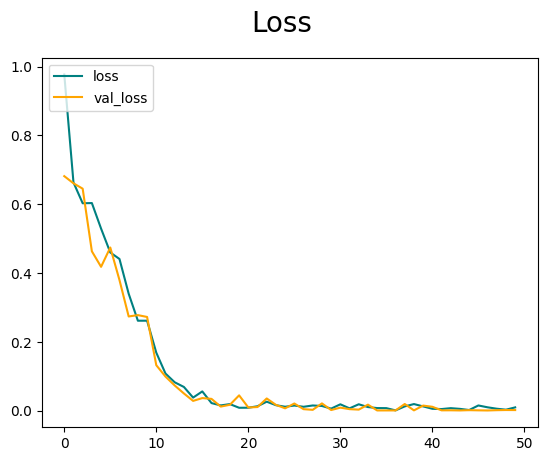

In [27]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

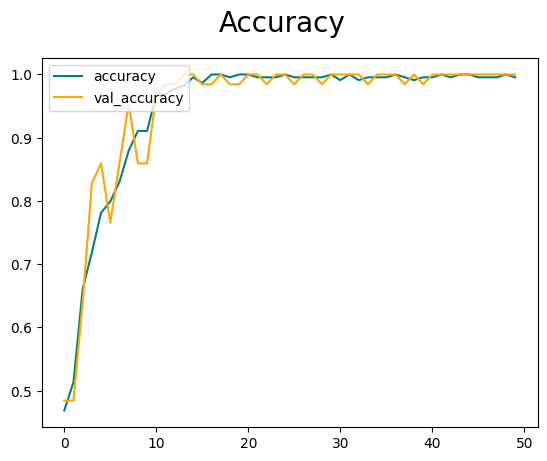

In [28]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [29]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [30]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [31]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 212ms/step


In [32]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [33]:
import cv2

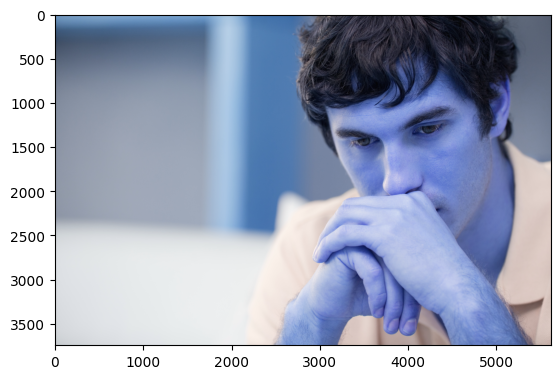

In [34]:
img = cv2.imread('8iAb9k4aT.jpg')
plt.imshow(img)
plt.show()

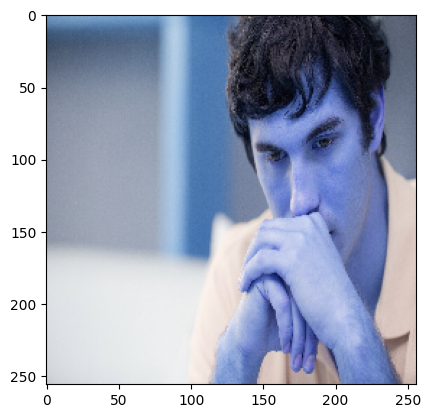

In [35]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [36]:
check = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 31ms/step


In [37]:
check

array([[0.9989536]], dtype=float32)

In [38]:
if check > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


In [39]:
from tensorflow.keras.models import load_model

In [40]:
model.save(os.path.join('models','imageclassifier.h5'))

In [41]:
new_model = load_model('models/imageclassifier.h5')

In [42]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 73ms/step


array([[0.9989536]], dtype=float32)

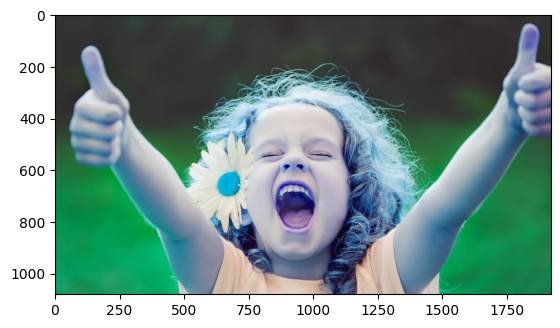

In [43]:
img2 = cv2.imread('getty_505175324_2000131020009280246_158016.jpg')
plt.imshow(img2)
plt.show()

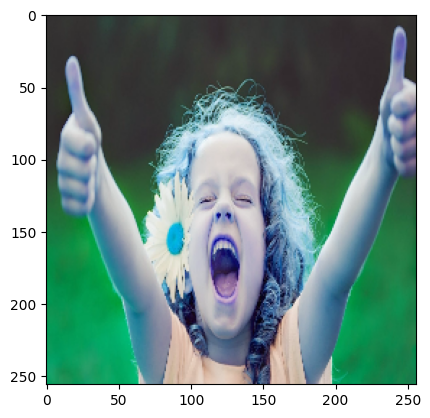

In [44]:
size = tf.image.resize(img2, (256,256))
plt.imshow(size.numpy().astype(int))
plt.show()

In [45]:
model_predict = load_model('models/imageclassifier.h5')

In [46]:
check = model_predict.predict(np.expand_dims(size/255, 0))

1/1 [==============================] - 0s 76ms/step


In [47]:
if check > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


In [48]:
check

array([[0.00102837]], dtype=float32)